$$
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from module import signal, wave

# Sampling

Many signal we encounter in real life are [analog signals](./introduction.ipynb#Analog-vs-Digital).
However, to process it, we need to convert it into a discrete-time series sequence, to store and process it digitally.
This is called **sampling**.

We do this by capturing the value of the signal $x(t)$ every $T_s$ seconds to obtain a sequence: $x_n = x(nT_s)$.

This is very similar to what we obtain when we were multiply the signal with a Dirac comb function:
$$
x_s(t) = x(t) \sum_n \delta(t-nT_s) = \sum_n x(nT_s) \delta(t-nT_s) = \sum _n x_n \delta(t-nT_s)
$$

The discrete-time Fourier transform of $x_n$ is the same as the Fourier transform of $x_s(t)$.

## Idealized linear time-invariant filters

Electronic filters are analog circuits which removes undesirable frequencies from a signal, or enhance desirable ones.
The **pass-band** is the band of frequencies that a filter allows to pass through, and the band of frequencies that are rejected is the **stop-band**.

An **idealized filter/brick-wall filter** has full transmission in the pass-band, and complete attenuation in the stop band, with abrupt transmission.
In other words, it pass through all the frequencies in the pass-band, and rejects all frequencies in the stop-band.

### Ideal low-pass filter (non-causal)

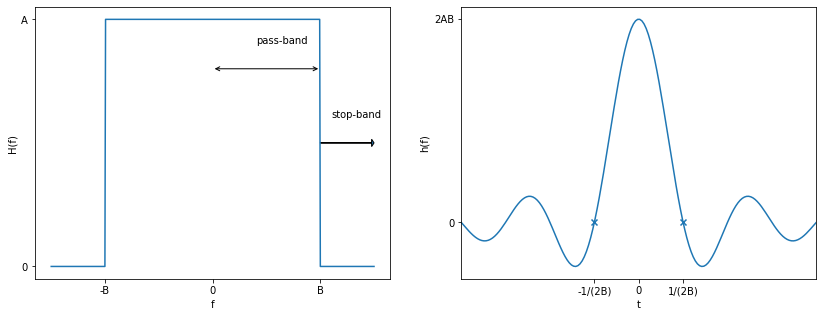

In [2]:
A, B = 1, 2
fs = np.linspace(-3, 3, 500)
_, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(fs, signal.rect(fs, 2*B))
axs[0].set_xticks([-B, 0, B], ['-B', 0, 'B'])
axs[0].set_yticks([0, A], [0, 'A'])
axs[0].annotate(text='', xytext=(0, 0.8), xy=(
    B, 0.8), arrowprops=dict(arrowstyle='<->'))
axs[0].text(0.8, 0.9, "pass-band")

axs[0].arrow(B, 0.5, 1, 0, head_width=0.03, length_includes_head=True)
axs[0].text(2.2, 0.6, "stop-band")

axs[1].set_xlim(-1, 1)
axs[1].plot(fs, 2*A*B*signal.sinc(fs, 1/(2 * B)))
axs[1].set_xticks([-1/(2*B), 0, 1/(2*B)], ["-1/(2B)", 0, "1/(2B)"])
axs[1].set_yticks([0, 2 * A * B], [0, "2AB"])
axs[1].scatter([-1/(2*B), 1/(2*B)], [0, 0], marker='x')

axs[0].set_xlabel('f')
axs[1].set_xlabel('t')
axs[0].set_ylabel('H(f)')
axs[1].set_ylabel('h(f)')
plt.show()

Frequency response: $H(f) = A rect \left( \frac{f}{2B} \right)$

Impulse response: $h(t) = 2AB sinc (2Bt)$

Cutoff frequency = $B$

### Ideal band-pass filter (non-casual)

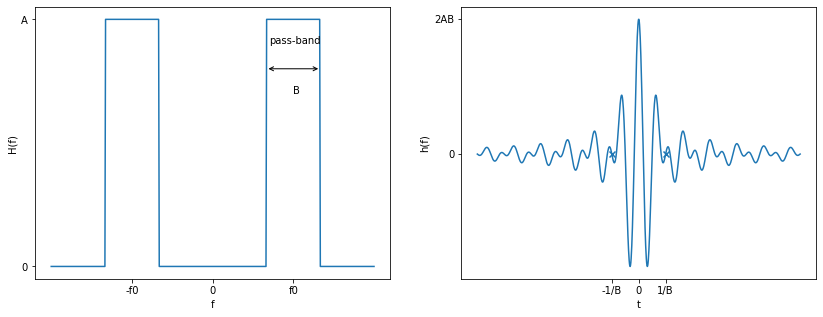

In [3]:
A, B, f0 = 1, 2, 3
fs = np.linspace(-6, 6, 500)
ts = np.linspace(-3, 3, 1000)
_, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(fs, signal.rect(fs - f0, B) + signal.rect(fs + f0, B))
axs[0].set_xticks([-f0, 0, f0], ['-f0', 0, 'f0'])
axs[0].set_yticks([0, A], [0, 'A'])
axs[0].annotate(text='', xytext=(f0 - B/2, 0.8),
                xy=(f0 + B/2, 0.8), arrowprops=dict(arrowstyle='<->'))
axs[0].text(2.1, 0.9, "pass-band")
axs[0].text(3, 0.7, "B")

axs[1].plot(ts, 2*A*B*signal.sinc(ts, 1/B) * np.cos(2 * np.pi * f0 * ts))
axs[1].set_xticks([-1/B, 0, 1/B], ["-1/B", 0, "1/B"])
axs[1].set_yticks([0, 2 * A * B], [0, "2AB"])
axs[1].scatter([-1/B, 1/B], [0, 0], marker='x')

axs[0].set_xlabel('f')
axs[1].set_xlabel('t')
axs[0].set_ylabel('H(f)')
axs[1].set_ylabel('h(f)')
plt.show()

Frequency response: $H(f) = A\left[rect \left( \frac{f + f_0}{B} \right) + rect \left( \frac{f - f_0}{B} \right) \right]$

Impulse response: $h(t) = 2AB sinc (Bt) \cos (2 \pi f_0 t)$

Upper cutoff frequency = $f_0 + B/2$

Lower cutoff frequency = $f_0 - B/2$

Center frequency = $f_0$

Bandwidth = $B$

Note that most physical filters are not ideal.
They do not have a abrupt cutoff at the boundary, and thus attenuate some frequencies in the pass-band while allowing some in the stop-band.

## Sampling and reconstruction

We obtain the following identity when we sample a signal and pass it through a filter:
$$
\hat x(t) =  \left[x(t) \times \xi _{T_s} (t) \right] * h(t) \leftrightharpoons \left[ X(f) * \Xi_{T_s}(f) \right] \times H(f) =  \hat X(f)
$$

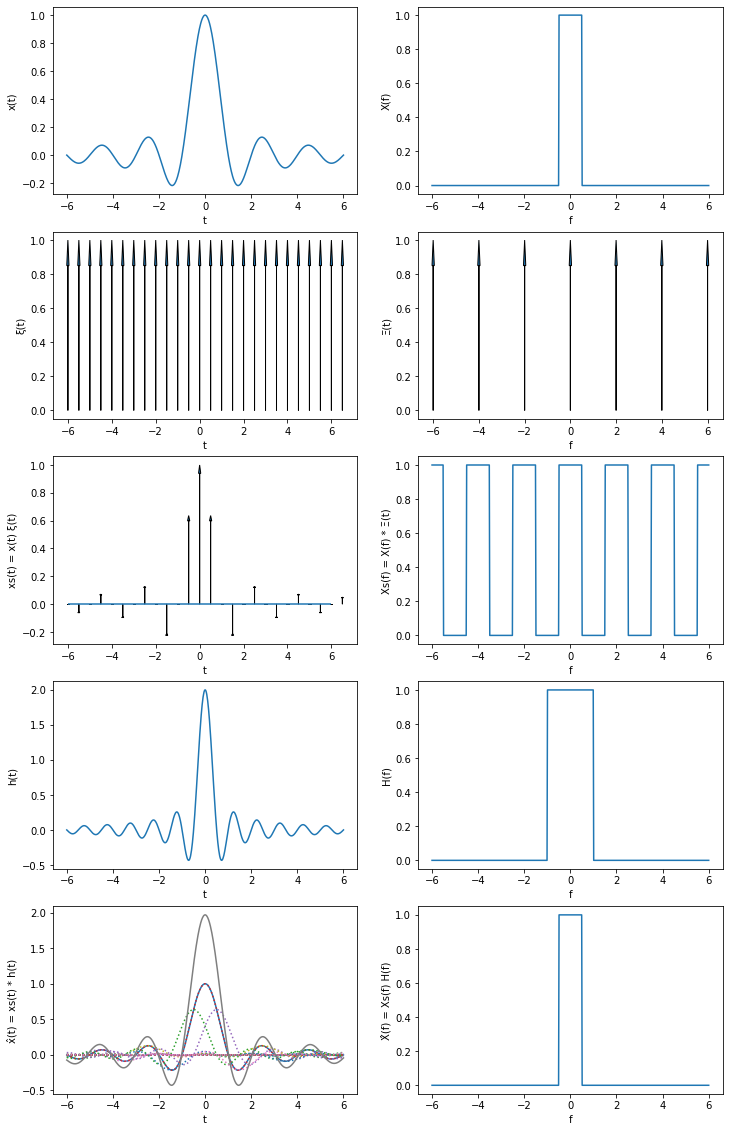

In [23]:
T = 1
Ts = T/2
B = 1
_, axs = plt.subplots(5, 2, figsize=(12, 20))

ts = np.linspace(-6, 6, 600)
fs = np.linspace(-6, 6, 600)

xt = signal.sinc(ts, T)
axs[0][0].plot(ts, xt)
axs[0][0].set_ylabel('x(t)')

axs[0][1].plot(fs, T * signal.rect(fs, 1/T))
axs[0][1].set_ylabel('X(f)')


for x in np.arange(-6, 7, Ts):
    axs[1][0].arrow(x, 0, 0, 1, head_width=0.1, length_includes_head=True)
axs[1][0].set_ylabel('ξ(t)')

for x in np.arange(-6, 7, 1/Ts):
    axs[1][1].arrow(x, 0, 0, 1, head_width=0.1, length_includes_head=True)
axs[1][1].set_ylabel('Ξ(t)')

for x in np.arange(-6, 7, Ts):
    axs[2][0].arrow(x, 0, 0, signal.sinc(x, T), head_width=0.1,
                    head_length=signal.sinc(x, T) * 0.06, length_includes_head=True)
axs[2][0].hlines(0, -6, 6)
axs[2][0].set_ylabel('xs(t) = x(t) ξ(t)')

Xsf = wave.square(fs, 1/(2*Ts), 1)
axs[2][1].plot(fs, Xsf)
axs[2][1].set_ylabel('Xs(f) = X(f) * Ξ(t)')

axs[3][0].plot(ts, 2*B * signal.sinc(ts, 1/(2*B)))
Hf = signal.rect(fs, 2*B)
axs[3][0].set_ylabel('h(t)')

axs[3][1].plot(fs, Hf)
axs[3][1].set_ylabel('H(f)')

axs[4][0].plot(ts, xt)

for t in np.arange(-6, 7, Ts):
    factor = signal.sinc(t, T)
    axs[4][0].plot(ts, factor * signal.sinc(ts - t, T), ":")

x_hat = np.sum(np.array([signal.sinc(t, T) * signal.sinc(ts - t, T)
               for t in np.arange(-6, 7, Ts)]), axis=0)
axs[4][0].plot(ts, x_hat)
axs[4][0].set_ylabel('x̂(t) = xs(t) * h(t)')

axs[4][1].plot(ts, Hf * Xsf)
axs[4][1].set_ylabel('X̂(f) = Xs(f) H(f)')

for ax in axs:
    ax[0].set_xlabel('t')
    ax[1].set_xlabel('f')

Our pipeline is rather intuitive.
We performed the following:
1. Sample the analog signal
2. Filter out all the signal to only the frequencies we are interested in
3. Using this bandwidth frequency, we are able to produce $\hat x(t)$, the signal without the stop-band frequencies
    * Since applying the filter in the frequency domain is the same as replication in the time domain
    * In our example, our bandwidth covers the whole frequency of the signal, thus the reconstruction is identical to $x(t)$


Notice that we isolated 1 "pulse" of the frequency from the replicated function.
And this singular pulse is sufficient to reproduce the entire function, since it was simply the Fourier transform of $x(t)$.

Now, what happens if our bandwidth is too large?
In other words, what if our sampling frequency is too low for our frequency band?

We will now fix the bandwidth, but change our sampling frequency.

In [24]:
from module import wave

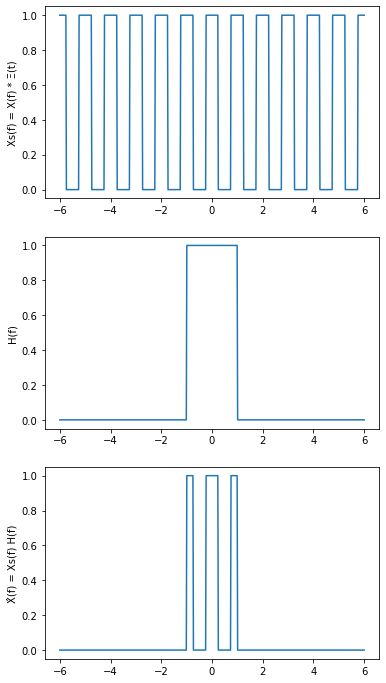

In [25]:
Ts = T
_, axs = plt.subplots(3, 1, figsize=(6, 12))

Xsf = wave.square(fs, 1/(2*Ts), 1)
axs[0].plot(fs, Xsf)
axs[0].set_ylabel('Xs(f) = X(f) * Ξ(t)')

axs[1].plot(fs, Hf)
axs[1].set_ylabel('H(f)')

axs[2].plot(ts, Hf * Xsf)
axs[2].set_ylabel('X̂(f) = Xs(f) H(f)')
plt.show()

Now, our sampling rate is too low, and thus our filter captured too many frequencies.
This would have cause issues when we are reconstructing the signal.

In [26]:
from module import fourier

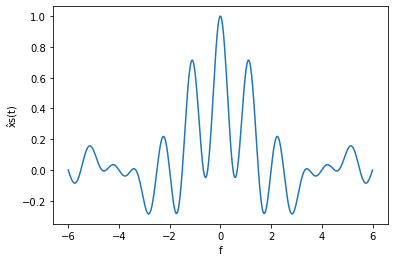

In [27]:
def func(t): return wave.square(t, 1/(2 * Ts), 1) if -1 < t < 1 else 0
def x_hat_func(f): return fourier.transform(func, f)


plt.plot(fs, x_hat_func(fs))
plt.xlabel('f')
plt.ylabel('x̂s(t)')
plt.show()

/home/own3d/wellspring/signal_processing/module/fourier.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ck_rs = [quad(lambda t: (func(t) * np.exp(-2j * np.pi * f * t)


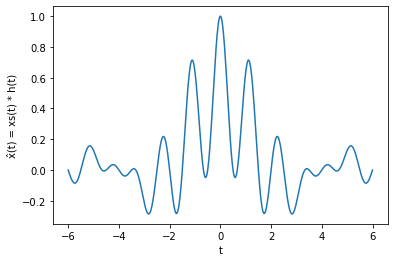

In [28]:
x_hat = np.sum(np.array([signal.sinc(t, T) * x_hat_func(ts - t)
               for t in np.arange(-5, 6, Ts)]), axis=0)
plt.plot(ts, x_hat)
plt.ylabel('x̂(t) = xs(t) * h(t)')
plt.xlabel('t')
plt.show()

The spectral image are overlapping, causing **frequency aliasing**.

In fact, we can better visualize this by considering a signal that is already bandlimited.

When we replicate the signal in the frequency domain (resulted from sampling in the time domain), if the replication interval/sampling rate is too low, then the spectral image will overlap, making it difficult for us to recover the original spectral image.

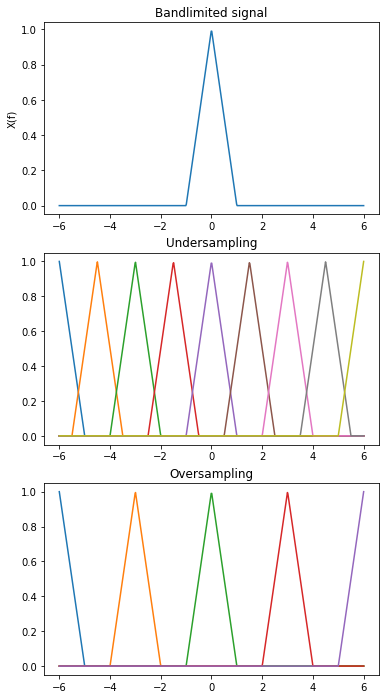

In [44]:
_, axs = plt.subplots(3, 1, figsize=(6, 12))

axs[0].plot(fs, signal.tri(fs, 1))
axs[0].set_ylabel('X(f)')
axs[0].set_title('Bandlimited signal')

for i in np.arange(-6, 7, 1.5):
    axs[1].plot(fs, signal.tri(fs - i, 1))
axs[1].set_title('Undersampling')

for i in np.arange(-6, 7, 3):
    axs[2].plot(fs, signal.tri(fs - i, 1))
axs[2].set_title('Oversampling')
plt.show()

### Conditions for perfect reconstruction

* Signal must be band-limited
* Sampling rate of $f_s \geq 2f_m$ 
* $|H(f)|$ = $K$ if $f$ is in pass-band, $0$ otherwise
* $\angle H(f)$ is linear

When $f_s > 2f_m$, it means we are **oversampling** the signal.

When we do this, we are relaxing the requirement for an ideal low pass filter, in exchange of worsening signal-to-noise ratio.

This brings us to an important concept, that "the sampling rate must be high enough".

### Nyquist sampling theorem

*A band-limited signal of finite energy, where $W$ Hz is the highest frequency component:*
* *can be completely described by specifying the values of the signal at intervals of $\frac{1}{2W}$*
* *can be completely recovered from the samples taken above*

$2W$ is the **Nyquist sampling frequency/Nyquist rate**.

### Sampling band-limited bandpass signal below Nyquist rate

If our signal is a **band-limited bandpass** signal, we are actually able to sample below the Nyquist rate while achieving perfect reconstruction.
We would want to do so as sampling at a lower rate reduces the performance cost.

The Nyquist rate for a bandpass filter is $f_s \geq 2(f_c + B/2) = 2f_c + B$.

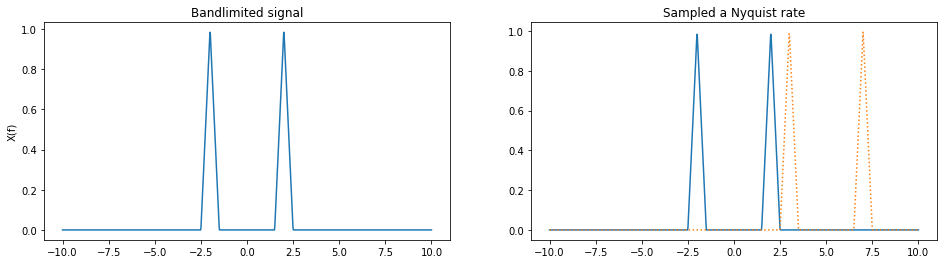

In [67]:
_, axs = plt.subplots(1, 2, figsize=(16, 4))

fs = np.linspace(-10, 10, 1000)
fc, B = 2, 1
axs[0].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[0].set_ylabel('X(f)')
axs[0].set_title('Bandlimited signal')

fN = 2 * fc + B
axs[1].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[1].plot(fs, signal.tri(fs - fc - fN, B/2) + signal.tri(fs + fc - fN, B/2), ':')
axs[1].set_title('Sampled a Nyquist rate')
plt.show()

Using the Nyquist rate, the next spectral image will start right after the first one ends.

We have 2 ways to sample at a lower rate:

#### Perfectly overlapping spectral images

Since the spectral image is symmetrical about $0$, we can select a sampling rate such that the spectral images perfectly align with each other.

**This is possible when $f_c > B/2$**

The frequency would be $f_s = \frac{2f_c}{k} \quad k=1, 2, \dots, \lfloor \frac{2f_c}{B} \rfloor$

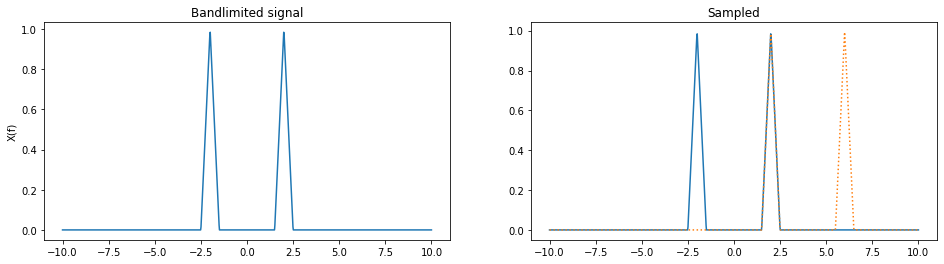

In [69]:
_, axs = plt.subplots(1, 2, figsize=(16, 4))

fs = np.linspace(-10, 10, 1000)
fc, B = 2, 1
axs[0].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[0].set_ylabel('X(f)')
axs[0].set_title('Bandlimited signal')

s = 4
axs[1].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[1].plot(fs, signal.tri(fs - fc - s, B/2) + signal.tri(fs + fc - s, B/2), ':')
axs[1].set_title('Sampled')
plt.show()

Notice that the spectral image completely overlaps with the next one.
This means our resultant spectral image would be scaled up, but it retains the same shape, thus our signal will not be distorted

#### Un-aliased spectral images

Another way is to sample such that the spectral images don't overlap, while being below the Nyquist rate.

**This is possible when $f_c > 3B/2$**

The frequency would be $\frac{2f_c + B}{k+1} \leq f_s \leq \frac{2f_c - B}{k} \quad k=1, 2, \dots, \lfloor \frac{2f_c - B}{2B} \rfloor$

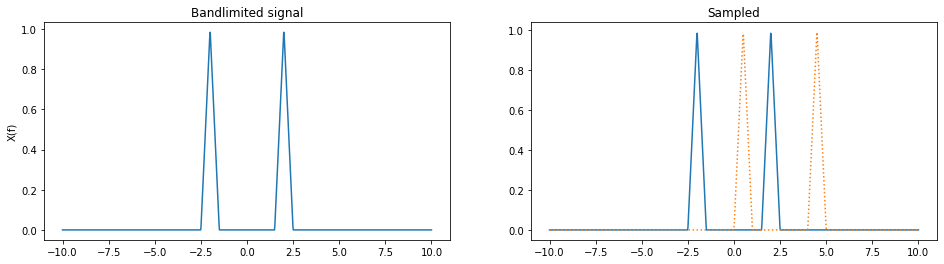

In [70]:
_, axs = plt.subplots(1, 2, figsize=(16, 4))

fs = np.linspace(-10, 10, 1000)
fc, B = 2, 1
axs[0].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[0].set_ylabel('X(f)')
axs[0].set_title('Bandlimited signal')

s = 2.5
axs[1].plot(fs, signal.tri(fs - fc, B/2) + signal.tri(fs + fc, B/2))
axs[1].plot(fs, signal.tri(fs - fc - s, B/2) + signal.tri(fs + fc - s, B/2), ':')
axs[1].set_title('Sampled')
plt.show()

This way, the spectral images are being overlaid in the gaps of the other spectral images, thus the signal also will not be distorted.